In [2]:
#Regular Importing
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [3]:
# Keras Importing
!pip install tensorflow
!pip install keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

<AxesSubplot:>

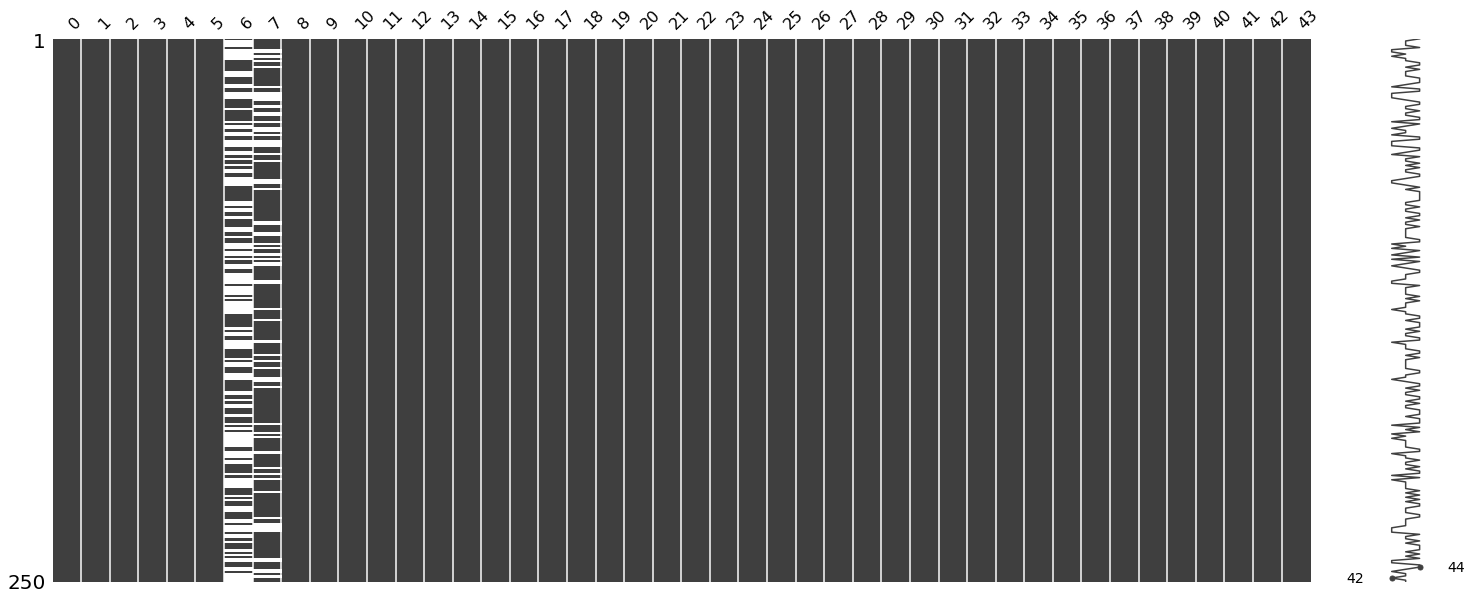

In [59]:
# Importing for seeing the missing Data
!pip install missingno
import missingno as msno

In [4]:
# Data Loading
testDf = pd.read_csv("WFTest.csv")
trainDf = pd.read_csv("WFTrain.csv")
trainDf.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018 11:3:58,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021 15:55:10,1993-01-06 00:00:00,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07 00:00:00,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019 1:8:39,1994-02-01 00:00:00,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019 6:45:37,2001-11-01 00:00:00,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,UT,5/8/2020 10:27:6,1987-02-07 00:00:00,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud


In [5]:
# Setting up the Features
numerical = ['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL','CUST_AGE',
             'OPEN_ACCT_CT', 'WF_dvc_age', 'CUST_ZIP']
categorical = ['CARR_NAME', 'RGN_NAME', 'STATE_PRVNC_TXT', 'ALERT_TRGR_CD',
                  'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD', 'AUTHC_SCNDRY_STAT_TXT',
                  'CUST_STATE','ACTN_CD','ACTN_INTNL_TXT','TRAN_TYPE_CD']
X_cat = pd.get_dummies(trainDf[categorical])
X_num = trainDf[numerical].astype(float)
X = pd.concat([X_num, X_cat], axis = 1)
X

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CUST_ZIP,CARR_NAME_24 shells,CARR_NAME_3ds communications llc,CARR_NAME_432 internet llc,CARR_NAME_702 communications,...,CUST_STATE_TX,CUST_STATE_UT,CUST_STATE_VA,CUST_STATE_WA,CUST_STATE_WI,CUST_STATE_WV,CUST_STATE_WY,ACTN_CD_SCHPMT,ACTN_INTNL_TXT_P2P_COMMIT,TRAN_TYPE_CD_P2P
0,5.38,23619.91,47.0,4.0,2777.0,89002.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,65.19,0.00,45.0,5.0,2721.0,94541.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,54.84,34570.63,36.0,8.0,1531.0,21811.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0.01,0.00,62.0,3.0,835.0,89822.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,497.08,12725.18,81.0,2.0,1095.0,84108.0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55.0,4.0,142.0,92503.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
13996,114.38,0.00,44.0,10.0,272.0,80478.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
13997,493.00,2848.63,54.0,3.0,517.0,33579.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
13998,491.64,3163.25,21.0,3.0,0.0,91702.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [32]:
# Getting the Y values
Y = trainDf["FRAUD_NONFRAUD"]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
encoded_Y

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [86]:
# Creating the Metric
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [87]:
# Creating the baseline
def create_base_model():
    # create model
    model = Sequential()
    model.add(Dense(350, input_dim= 771, activation='relu')) # 2 Layers Right Now
    model.add(Dense(175, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [89]:
estimator = KerasClassifier(build_fn=create_base_model, epochs= 50, batch_size= 128, verbose=0)
kfold = StratifiedKFold(n_splits= 5, shuffle=True)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold, 
                             scoring= make_scorer(f1_score, pos_label = 1, labels=[1, 0]))
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/50
88/88 [==============================] - 1s 4ms/step - loss: 201.1359 - accuracy: 0.6481
Epoch 2/50
88/88 [==============================] - 0s 4ms/step - loss: 48.9683 - accuracy: 0.7004
Epoch 3/50
88/88 [==============================] - 0s 4ms/step - loss: 29.3696 - accuracy: 0.7507
Epoch 4/50
88/88 [==============================] - 0s 4ms/step - loss: 20.1089 - accuracy: 0.7611
Epoch 5/50
88/88 [==============================] - 0s 4ms/step - loss: 30.1518 - accuracy: 0.7422
Epoch 6/50
88/88 [==============================] - 0s 4ms/step - loss: 49.1889 - accuracy: 0.7292
Epoch 7/50
88/88 [==============================] - 0s 4ms/step - loss: 25.2470 - accuracy: 0.7576
Epoch 8/50
88/88 [==============================] - 0s 4ms/step - loss: 14.2615 - accuracy: 0.7830
Epoch 9/50
88/88 [==============================] - 0s 3ms/step - loss: 29.0306 - accuracy: 0.7435
Epoch 10/50
88/88 [==============================] - 0s 4ms/step - loss: 14.9381 - accuracy: 0.7668
Epoch 11

88/88 [==============================] - 0s 4ms/step - loss: 13.4975 - accuracy: 0.7829
Epoch 16/50
88/88 [==============================] - 0s 5ms/step - loss: 18.3658 - accuracy: 0.7557
Epoch 17/50
88/88 [==============================] - 0s 4ms/step - loss: 13.8898 - accuracy: 0.7788
Epoch 18/50
88/88 [==============================] - 0s 4ms/step - loss: 21.2357 - accuracy: 0.7693
Epoch 19/50
88/88 [==============================] - 0s 4ms/step - loss: 13.8275 - accuracy: 0.7843
Epoch 20/50
88/88 [==============================] - 0s 4ms/step - loss: 10.8673 - accuracy: 0.7817
Epoch 21/50
88/88 [==============================] - 0s 4ms/step - loss: 11.0662 - accuracy: 0.7854
Epoch 22/50
88/88 [==============================] - 0s 4ms/step - loss: 13.0013 - accuracy: 0.7710
Epoch 23/50
88/88 [==============================] - 0s 4ms/step - loss: 6.6502 - accuracy: 0.8103
Epoch 24/50
88/88 [==============================] - 0s 4ms/step - loss: 15.3886 - accuracy: 0.7796
Epoch 25/50
8

So, we get a baseline of ~90% just by training Keras on the default features. There's quite a lot of them, so this doesn't seem really optimal.

## Let's Try Feature Engineering

In [7]:
# Trying this out with Josh's Feature Engineering
testDf = pd.read_csv("WFTest.csv")
trainDf = pd.read_csv("WFTrain.csv")

to_datetime = ['PWD_UPDT_TS', 'PH_NUM_UPDT_TS', 'CUST_SINCE_DT','TRAN_TS',
               'TRAN_DT', 'ACTVY_DT']
for datetime in to_datetime:
  trainDf[datetime] = pd.to_datetime(trainDf[datetime], errors='coerce')

to_categorical = ['CARR_NAME', 'RGN_NAME', 'STATE_PRVNC_TXT', 'ALERT_TRGR_CD',
                  'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD', 'AUTHC_SCNDRY_STAT_TXT',
                  'CUST_STATE','ACTN_CD','ACTN_INTNL_TXT','TRAN_TYPE_CD',
                  'FRAUD_NONFRAUD']

for category in to_categorical:
  trainDf[category] = trainDf[category].astype("category")

redundant = ['ACTN_CD', 'TRAN_TYPE_CD','ACTN_INTNL_TXT','ACTVY_DT']
trainDf.drop(columns = redundant, inplace=True)

trainDf.FRAUD_NONFRAUD = trainDf.FRAUD_NONFRAUD == 'Fraud'
trainDf['FRAUD_NONFRAUD'] = trainDf['FRAUD_NONFRAUD'].astype(int)

trainDf

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,CUST_ZIP,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,2018-01-16 11:03:58,cox communications inc.,southwest,nevada,MOBL,NaN,UN_PWD,ALLOW,89002,NV,2021-02-24 15:55:10,1993-01-06,2021-05-03 18:03:58,2021-05-03,0
1,65.19,0.00,45,5,2721,NaT,charter communications,southwest,california,MOBL,NaN,FACE_ID,ALLOW,94541,CA,NaT,1971-01-07,2021-01-13 19:19:37,2021-01-13,0
2,54.84,34570.63,36,8,1531,2021-12-22 10:42:51,utah broadband llc,mountain,utah,ONLN,DESKTOP,UN_PWD,ALLOW,21811,MD,2019-05-05 01:08:39,1994-02-01,2021-04-08 09:42:51,2021-04-08,1
3,0.01,0.00,62,3,835,2020-02-08 07:28:31,t-mobile usa inc.,southwest,california,MOBL,MOBILE,UN_PWD,ALLOW,89822,NV,2019-02-16 06:45:37,2001-11-01,2021-08-10 15:28:31,2021-08-10,0
4,497.08,12725.18,81,2,1095,2020-12-28 12:12:44,cogent communications,south central,texas,MOBL,MOBILE,UN_PWD,CHALLENGE_SUCCESS,84108,UT,2020-05-08 10:27:06,1987-02-07,2021-06-27 11:12:44,2021-06-27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,142,NaT,cellco partnership dba verizon wireless,southwest,california,MOBL,MOBILE,UN_PWD,ALLOW,92503,CA,2017-07-15 06:58:59,2001-06-05,2021-03-12 12:11:59,2021-03-12,0
13996,114.38,0.00,44,10,272,2017-11-02 04:28:20,t-mobile usa inc.,southwest,california,MOBL,MOBILE,FACE_ID,ALLOW,80478,CO,NaT,2010-06-03,2021-06-11 09:28:20,2021-06-11,0
13997,493.00,2848.63,54,3,517,2021-06-03 19:31:15,att services inc,southwest,california,MOBL,DESKTOP,UN_PWD,ALLOW,33579,FL,2021-05-25 08:50:05,1984-10-27,2021-05-16 12:31:15,2021-05-16,1
13998,491.64,3163.25,21,3,0,2020-03-02 11:34:54,NaN,NaN,NaN,ONLN,DESKTOP,UN_PWD,ALLOW,91702,CA,NaT,2021-03-01,2021-05-11 12:34:54,2021-05-11,1


In [8]:
#Similar data cleaning process as above
DfProc = trainDf

carrMap = {
    'cox communications inc.' : 'cox',
    't-mobile usa  inc.' : 'tmobile',
    'charter communications inc' : 'charter',
    'comcast' : 'comcast',
    'comcast cable communications  llc' : 'comcast',
    'centurylink communications  llc' : 'century',
    'frontier communications of america  inc.' : 'frontier',
    'att services inc' : 'att',
    'charter communications' : 'charter',
    'at&t mobility llc ' : 'att',
    'cellco partnership dba verizon wireless' : 'verizon',
}

regionSet = { 'southwest', 'south central', 'southeast', 'mountain',
             'northeast', 'great lakes', 'mid atlantic', 'pacific northwest',
             'midwest'}
regionMap = {x:x for x in regionSet}
    

DfProc['CARR_NAME'] = DfProc['CARR_NAME'].map(carrMap).fillna("other")
DfProc['RGN_NAME'] = DfProc['RGN_NAME'].map(regionMap).fillna("other")

#ADDITIONAL FEATURE ENGINEERING - - - - - - - - - - - - 

#Normalize date features against transaction date
# How old was the account when it made the transaction
DfProc['DAY_ACC_AGE'] = (
    DfProc['TRAN_TS'] - DfProc['CUST_SINCE_DT']).dt.days
# How long was it been since the phone number was updated since the transaction
DfProc['DAY_FRM_NUM_UPDT'] = (
    DfProc['TRAN_TS'] - DfProc['PH_NUM_UPDT_TS']).dt.days
# How long was it been since the password was updated since the transaction
DfProc['DAY_FRM_PWD_UPDT'] = (
    DfProc['TRAN_TS'] - DfProc['PWD_UPDT_TS']).dt.days

# Cleaning "region" column to match entries in state column.
# States were mapped to their abbreviations, if state outside US its mapped to
# "INT" for international
stateDict = {'nevada' : 'NV', 'california': 'CA', 'utah': 'UT', 'texas': 'TX','arizona': 'AZ', 'wisconsin': 'WI', 'minnesota': 'MN', 'phnum penh' : 'INT','alabama': 'AL', 'florida': 'FL', 'nebraska': 'NE', 'south dakota': 'SD',
 'punjab': 'INT', 'north carolina': 'NC', 'new york': 'NY', 'michigan': 'MI','colorado': 'CO', 'massachusetts': 'MA', 'antioquia': 'INT', 'washington': 'WA','arkansas': 'AR', 'new jersey': 'NJ', 'kentucky': 'KY', 'ostergotlands lan': 'INT',
 'tennessee': 'TN', 'district of columbia': 'DC', 'georgia': 'GA', 'maryland': 'MD','oregon': 'OR', 'wyoming': 'WY', 'oklahoma': 'OK', 'illinois': 'IL','north dakota': 'ND', 'indiana': 'IN', 'pennsylvania': 'PA', 'distrito nacional': 'INT',
 'distrito capital': 'INT', 'iowa': 'IA', 'zuerich': 'INT', 'hamerkaz': 'INT','sonora': 'INT', 'madrid': 'INT', 'new mexico': 'NM', 'new south wales' : 'INT','loire-atlantique' : 'INT', 'carabobo' : 'INT', 'montana' : 'MT', 'idaho' : 'ID',
 'hong kong' : 'INT', 'ohio' : 'OH', 'south carolina': 'SC', 'missouri': 'MS', 'colima': 'INT', 'baja california': 'INT', 'noord-brabant': 'INT', 'nairobi area': 'INT', 'baden-wuerttemberg': 'INT', 'virginia' : 'VA','alaska': 'AK', 'hawaii': 'HI', 'kansas': 'KS', 'greater accra': 'INT', 'kingston': 'INT', 'connecticut' : 'CT', 'louisiana': 'LA', 'bolivar': 'INT',
 'lagos': 'INT', 'gujarat': 'INT', 'zulia': 'INT', 'morelos': 'INT', 'jalisco': 'INT', 'san salvador': 'INT', 'west bengal': 'INT', 'guerrero': 'INT', 'distrito federal': 'INT',
 'mississippi': 'MS', "saint george's": 'INT', 'hampshire': 'NH', 'paris': 'INT','mazowieckie': 'INT', 'region metropolitana': 'INT', 'ha noi': 'INT', 'lara': 'INT','maine': 'ME', 'seoul teukbyeolsi': 'INT', 'telangana': 'INT', 'victoria': 'INT',
 'kinshasa': 'INT', 'aguascalientes': 'INT', 'western australia': 'INT','andhra pradesh': 'INT', 'sao paulo': 'INT', 'nueva esparta': 'INT','dubayy': 'INT', 'chihuahua': 'INT', 'rhode island': 'ri', 'istanbul': 'INT','guatemala': 'INT', 'gauteng': 'INT', 'michoacan de ocampo': 'INT', "ra's al khaymah": 'INT',
 'sodermanlands lan': 'INT', 'da nang': 'INT', 'taipei': 'INT','sindh': 'INT','tamaulipas': 'INT','sinaloa': 'INT','liverpool': 'INT','western cape': 'INT', 'aragua': 'INT', 'british columbia': 'INT', 'guanacaste': 'INT','`amman': 'INT',
 'hessen': 'INT','ontario': 'INT','delaware': 'DE', 'dublin': 'INT', 'south west': 'INT', 'west virginia': 'WV', 'south australia': 'INT', 'delhi': 'INT', 'pichincha': 'INT', 'new providence': 'INT', 'tokyo': 'INT', 'nordrhein-westfalen' : 'INT'}

# Use statedict to create column to describe where transaction originated from
DfProc['TXT_STATE'] = DfProc['STATE_PRVNC_TXT'].map(stateDict).fillna("None")

#Function to apply to column of transaction location and customer location 
#To compare if the two match
def locationCompare(txtLoc, custLoc):
  if txtLoc != custLoc:
    if txtLoc == 'INT':
      return 'INT'
    else:
      return 'MISMATCH'
  return 'MATCH'

#Apply functino above to TXT state and CUST state column
DfProc['TXT_CASE'] = DfProc.apply(
    lambda x: locationCompare(x['TXT_STATE'], x['CUST_STATE']), axis=1)


## This didn't really help Josh so let's skip it
# #Read in external dataframe with data for each zip code
# zipInfoDf = pd.read_csv('zip_code_rural.csv')
# #Get population number (zpop) and population density (lzden )for each zip code
# zipInfoDf = zipInfoDf[['zip', 'zpop', 'lzden']]
# #Add this information to df
# DfProc = DfProc.merge(zipInfoDf, how='left', left_on='CUST_ZIP', right_on='zip')


#Similar process to above, we end up keeping the generated features
#And removing a lot of the really detailed categorical variables
categorical = ['CARR_NAME', 'RGN_NAME', 'STATE_PRVNC_TXT', 'ALERT_TRGR_CD',
                'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD', 'AUTHC_SCNDRY_STAT_TXT',
                'CUST_STATE', 'TXT_CASE']

remove = ['PWD_UPDT_TS', 'PH_NUM_UPDT_TS', 'CUST_SINCE_DT','TRAN_TS','TRAN_DT',
          'CUST_STATE', 'STATE_PRVNC_TXT', 'TXT_STATE', 'CUST_ZIP', 'zip']


categoricalDummies = [x for x in categorical if x not in remove]

for var in categoricalDummies:
    cat_list = pd.get_dummies(DfProc[var], prefix=var)
    DfProc=DfProc.join(cat_list)
data_vars=DfProc.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categorical and i not in remove]
DfProc=DfProc[to_keep]

DfProc

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,FRAUD_NONFRAUD,DAY_ACC_AGE,DAY_FRM_NUM_UPDT,DAY_FRM_PWD_UPDT,CARR_NAME_att,...,AUTHC_PRIM_TYPE_CD_AFA_PL,AUTHC_PRIM_TYPE_CD_FACE_ID,AUTHC_PRIM_TYPE_CD_TOUCH_ID,AUTHC_PRIM_TYPE_CD_UN_PWD,AUTHC_SCNDRY_STAT_TXT_ALLOW,AUTHC_SCNDRY_STAT_TXT_CHALLENGE_ISSUED,AUTHC_SCNDRY_STAT_TXT_CHALLENGE_SUCCESS,TXT_CASE_INT,TXT_CASE_MATCH,TXT_CASE_MISMATCH
0,5.38,23619.91,47,4,2777,0,10344,68.0,1203.0,0,...,0,0,0,1,1,0,0,0,1,0
1,65.19,0.00,45,5,2721,0,18269,NaN,NaN,0,...,0,1,0,0,1,0,0,0,1,0
2,54.84,34570.63,36,8,1531,1,9928,704.0,-259.0,0,...,0,0,0,1,1,0,0,0,0,1
3,0.01,0.00,62,3,835,0,7222,906.0,549.0,0,...,0,0,0,1,1,0,0,0,0,1
4,497.08,12725.18,81,2,1095,1,12559,415.0,180.0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,142,0,7220,1336.0,NaN,0,...,0,0,0,1,1,0,0,0,1,0
13996,114.38,0.00,44,10,272,0,4026,NaN,1317.0,0,...,0,1,0,0,1,0,0,0,0,1
13997,493.00,2848.63,54,3,517,1,13350,-9.0,-19.0,1,...,0,0,0,1,1,0,0,0,0,1
13998,491.64,3163.25,21,3,0,1,71,NaN,435.0,0,...,0,0,0,1,1,0,0,0,0,1


In [9]:
X = DfProc.loc[:, DfProc.columns != 'FRAUD_NONFRAUD'].astype(float)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
Y = DfProc['FRAUD_NONFRAUD']
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
encoded_Y

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
%matplotlib inline
msno.matrix(X.sample(250))

In [42]:
X_mean_imputed = X.fillna(X.mean())
X_mean_imputed

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-0.849367,0.446727,-0.368429,-0.294369,3.241988,0.418580,-1.219265e+00,1.375457e+00,-0.201835,-0.25583,...,-0.232845,-0.402635,-0.229588,0.573391,0.247323,-0.079077,-0.219943,-0.132905,2.237987,-2.107396
1,-0.661215,-0.341486,-0.474647,-0.183982,3.158167,1.991848,-9.161884e-17,-1.176828e-17,-0.201835,-0.25583,...,-0.232845,2.483638,-0.229588,-1.744010,0.247323,-0.079077,-0.219943,-0.132905,2.237987,-2.107396
2,-0.693775,0.812161,-0.952629,0.147176,1.376969,0.335996,2.377816e-01,-1.435870e+00,-0.201835,-0.25583,...,-0.232845,-0.402635,-0.229588,0.573391,0.247323,-0.079077,-0.219943,-0.132905,-0.446830,0.474519
3,-0.866261,-0.341486,0.428207,-0.404755,0.335192,-0.201198,7.005543e-01,1.178590e-01,-0.201835,-0.25583,...,-0.232845,-0.402635,-0.229588,0.573391,0.247323,-0.079077,-0.219943,-0.132905,-0.446830,0.474519
4,0.697438,0.083162,1.437280,-0.515141,0.724362,0.858301,-4.243041e-01,-5.917030e-01,-0.201835,-0.25583,...,-0.232845,-0.402635,-0.229588,0.573391,-4.043291,-0.079077,4.546628,-0.132905,-0.446830,0.474519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,5.227844,-0.333786,0.056444,-0.294369,-0.702094,-0.201595,1.685665e+00,-1.176828e-17,-0.201835,-0.25583,...,-0.232845,-0.402635,-0.229588,0.573391,0.247323,-0.079077,-0.219943,-0.132905,2.237987,-2.107396
13996,-0.506472,-0.341486,-0.527757,0.367949,-0.507509,-0.835667,-9.161884e-17,1.594671e+00,-0.201835,-0.25583,...,-0.232845,2.483638,-0.229588,-1.744010,0.247323,-0.079077,-0.219943,-0.132905,-0.446830,0.474519
13997,0.684603,-0.246425,0.003334,-0.404755,-0.140792,1.015330,-1.395669e+00,-9.743665e-01,4.954538,-0.25583,...,-0.232845,-0.402635,-0.229588,0.573391,0.247323,-0.079077,-0.219943,-0.132905,-0.446830,0.474519
13998,0.680325,-0.235926,-1.749266,-0.404755,-0.914640,-1.620812,-9.161884e-17,-1.013552e-01,-0.201835,-0.25583,...,-0.232845,-0.402635,-0.229588,0.573391,0.247323,-0.079077,-0.219943,-0.132905,-0.446830,0.474519


In [38]:
def create_feature_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim = 44, activation='relu')) # 2 Layers Right Now
    model.add(Dense(10, activation='relu'))
        model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [40]:
estimator = KerasClassifier(build_fn=create_feature_model, epochs= 50, batch_size= 128, verbose= 1)
kfold = StratifiedKFold(n_splits= 10, shuffle=True)
results = cross_val_score(estimator, X_mean_imputed, encoded_Y, cv=kfold, 
                          scoring = make_scorer(f1_score, pos_label = 1, labels=[1, 0]))
print("Feature Engineered: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/50
99/99 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6483
Epoch 2/50
99/99 [==============================] - 0s 984us/step - loss: 0.4080 - accuracy: 0.8271
Epoch 3/50
99/99 [==============================] - ETA: 0s - loss: 0.3353 - accuracy: 0.85 - 0s 849us/step - loss: 0.3349 - accuracy: 0.8533
Epoch 4/50
99/99 [==============================] - 0s 917us/step - loss: 0.3016 - accuracy: 0.8684
Epoch 5/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2804 - accuracy: 0.8768
Epoch 6/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2655 - accuracy: 0.8840
Epoch 7/50
99/99 [==============================] - 0s 989us/step - loss: 0.2559 - accuracy: 0.8891
Epoch 8/50
99/99 [==============================] - 0s 918us/step - loss: 0.2503 - accuracy: 0.8929
Epoch 9/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.8964
Epoch 10/50
99/99 [==============================] - 0s 1ms/step -

99/99 [==============================] - 0s 945us/step - loss: 0.2480 - accuracy: 0.8943
Epoch 12/50
99/99 [==============================] - 0s 966us/step - loss: 0.2453 - accuracy: 0.8948
Epoch 13/50
99/99 [==============================] - 0s 839us/step - loss: 0.2432 - accuracy: 0.8969
Epoch 14/50
99/99 [==============================] - 0s 897us/step - loss: 0.2409 - accuracy: 0.8993
Epoch 15/50
99/99 [==============================] - 0s 856us/step - loss: 0.2391 - accuracy: 0.8987
Epoch 16/50
99/99 [==============================] - 0s 962us/step - loss: 0.2374 - accuracy: 0.9009
Epoch 17/50
99/99 [==============================] - 0s 899us/step - loss: 0.2362 - accuracy: 0.9022
Epoch 18/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2355 - accuracy: 0.9029
Epoch 19/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2344 - accuracy: 0.9033
Epoch 20/50
99/99 [==============================] - 0s 958us/step - loss: 0.2330 - accuracy: 0.9033
Epoch 

99/99 [==============================] - 0s 714us/step - loss: 0.2323 - accuracy: 0.9040
Epoch 24/50
99/99 [==============================] - 0s 714us/step - loss: 0.2311 - accuracy: 0.9042
Epoch 25/50
99/99 [==============================] - 0s 817us/step - loss: 0.2307 - accuracy: 0.9057
Epoch 26/50
99/99 [==============================] - 0s 813us/step - loss: 0.2294 - accuracy: 0.9060
Epoch 27/50
99/99 [==============================] - 0s 815us/step - loss: 0.2285 - accuracy: 0.9051
Epoch 28/50
99/99 [==============================] - 0s 816us/step - loss: 0.2276 - accuracy: 0.9067
Epoch 29/50
99/99 [==============================] - 0s 818us/step - loss: 0.2269 - accuracy: 0.9079
Epoch 30/50
99/99 [==============================] - 0s 816us/step - loss: 0.2262 - accuracy: 0.9064
Epoch 31/50
99/99 [==============================] - 0s 817us/step - loss: 0.2255 - accuracy: 0.9071
Epoch 32/50
99/99 [==============================] - 0s 714us/step - loss: 0.2250 - accuracy: 0.9063
Ep

99/99 [==============================] - 0s 865us/step - loss: 0.3131 - accuracy: 0.8643
Epoch 5/50
99/99 [==============================] - 0s 783us/step - loss: 0.2951 - accuracy: 0.8721
Epoch 6/50
99/99 [==============================] - 0s 919us/step - loss: 0.2809 - accuracy: 0.8775
Epoch 7/50
99/99 [==============================] - 0s 916us/step - loss: 0.2701 - accuracy: 0.8830
Epoch 8/50
99/99 [==============================] - 0s 820us/step - loss: 0.2626 - accuracy: 0.8871
Epoch 9/50
99/99 [==============================] - 0s 918us/step - loss: 0.2571 - accuracy: 0.8887
Epoch 10/50
99/99 [==============================] - 0s 915us/step - loss: 0.2531 - accuracy: 0.8920
Epoch 11/50
99/99 [==============================] - 0s 922us/step - loss: 0.2496 - accuracy: 0.8919
Epoch 12/50
99/99 [==============================] - 0s 916us/step - loss: 0.2466 - accuracy: 0.8953
Epoch 13/50
99/99 [==============================] - 0s 817us/step - loss: 0.2440 - accuracy: 0.8970
Epoch 1

99/99 [==============================] - 0s 815us/step - loss: 0.2244 - accuracy: 0.9056
Epoch 36/50
99/99 [==============================] - 0s 817us/step - loss: 0.2237 - accuracy: 0.9061
Epoch 37/50
99/99 [==============================] - 0s 816us/step - loss: 0.2233 - accuracy: 0.9065
Epoch 38/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2230 - accuracy: 0.9075
Epoch 39/50
99/99 [==============================] - 0s 815us/step - loss: 0.2228 - accuracy: 0.9064
Epoch 40/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2221 - accuracy: 0.9071
Epoch 41/50
99/99 [==============================] - 0s 815us/step - loss: 0.2218 - accuracy: 0.9083
Epoch 42/50
99/99 [==============================] - 0s 915us/step - loss: 0.2208 - accuracy: 0.9088
Epoch 43/50
99/99 [==============================] - 0s 919us/step - loss: 0.2206 - accuracy: 0.9085
Epoch 44/50
99/99 [==============================] - 0s 818us/step - loss: 0.2203 - accuracy: 0.9081
Epoch 

## Let's Try Imputing

In [10]:
# Maybe we should try a better imputing? Let's see what happens with imputing. 
from numpy import isnan
from sklearn.impute import KNNImputer

# Convert to numpy array
features = np.array(X)

# print total missing
print('Missing: %d' % sum(isnan(features).flatten()))
# define imputer
imputer = KNNImputer(missing_values=np.nan)
# fit on the dataset
imputer.fit(features)
# transform the dataset
features_trans = imputer.transform(features)
# print total missing
print('Missing: %d' % sum(isnan(features_trans).flatten()))

Missing: 10695
Missing: 0


In [ ]:
def create_feature_imputed_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim = 44, activation='relu')) # 2 Layers Right Now
    model.add(Dense(10, activation='relu'))
        model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
estimator = KerasClassifier(build_fn=create_feature_model, epochs= 50, batch_size= 128, verbose= 1)
kfold = StratifiedKFold(n_splits= 10, shuffle=True)
results = cross_val_score(estimator, features_trans, encoded_Y, cv=kfold, 
                          scoring = make_scorer(f1_score, pos_label = 1, labels=[1, 0]))
print("Feature Engineered: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))